# Experimento de Franck-hertz

In [273]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [274]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 120

Dados

In [275]:
Vr = 1.55

In [276]:
data = {}

for file in os.listdir('dados/ionizacao/'):
	if file not in ['checkpoints', '.ipynb_checkpoints']:
		T = file.split('_')[1].split('.')[0]

		T = int(T)

		if T not in data: data[T] = {}

		load_data = np.loadtxt(f'dados/ionizacao//{file}').transpose()
		data[T]['Tensão (V)'] = load_data[0]
		data[T]['Corrente (A)'] = load_data[1]
		data[T]['Temperatura (°C)'] = load_data[2]

		data[T] = pd.DataFrame(data[T])

## Curvas de corrente

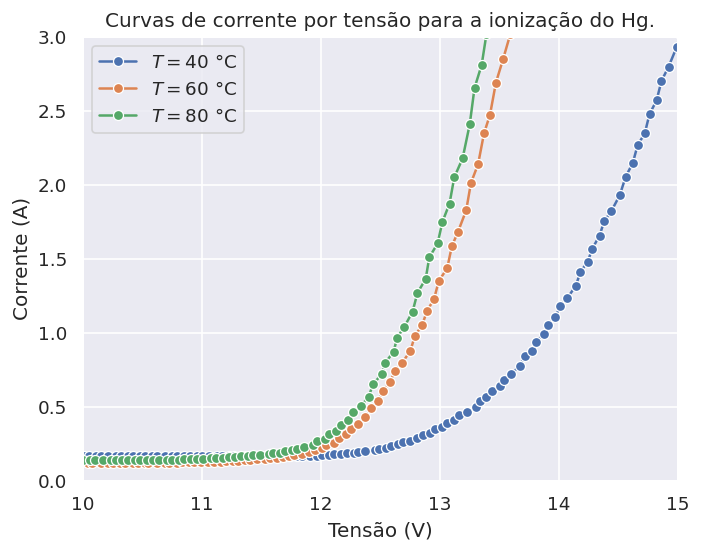

In [277]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

for T in [ 40, 60, 80 ]: sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='o')

plt.xlim(10, 15)
plt.ylim(0, 3)

plt.savefig('plots/ioni_current_curves_cut.png', dpi=300, bbox_inches='tight')
plt.show()

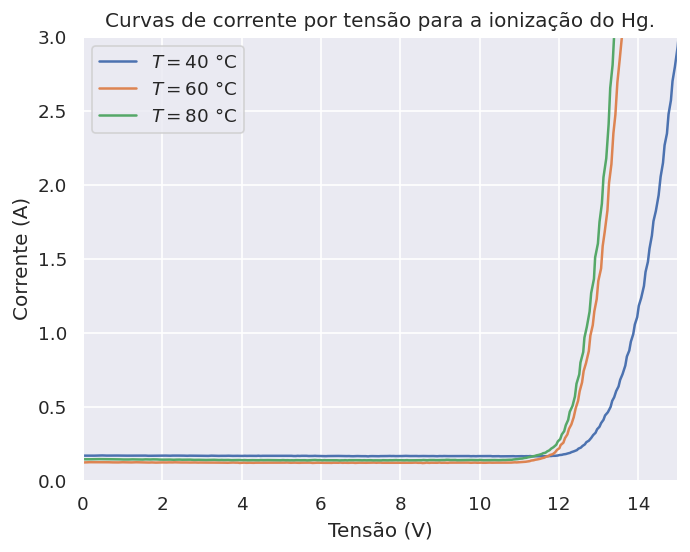

In [278]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

for T in [ 40, 60, 80 ]: sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C')

plt.xlim(0, 15)
plt.ylim(0, 3)

plt.savefig('plots/ioni_current_curves_full.png', dpi=300, bbox_inches='tight')
plt.show()

## Determinação do potencial de ionização (intervalo de confiança)

In [279]:
V0s = []

### 40°C

In [280]:
T = 40
df = data[T]

In [281]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [282]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

In [283]:
# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

In [284]:
# Determinação do potenical de ionização
buff				= pd.DataFrame(df.loc[(df['Tensão (V)'] > 10)])
buff['Delta (A)']	= -buff['Corrente (A)'] - popt[0] * buff['Tensão (V)'] - popt[1]
Deltas				= list(t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (buff['Tensão (V)'] - np.mean(xdata))**2 / S_xx ))

In [285]:
for i,D in enumerate(list(buff['Delta (A)'])):
	if D > Deltas[i]:
		V0s.append(list(buff['Tensão (V)'])[i])
		break

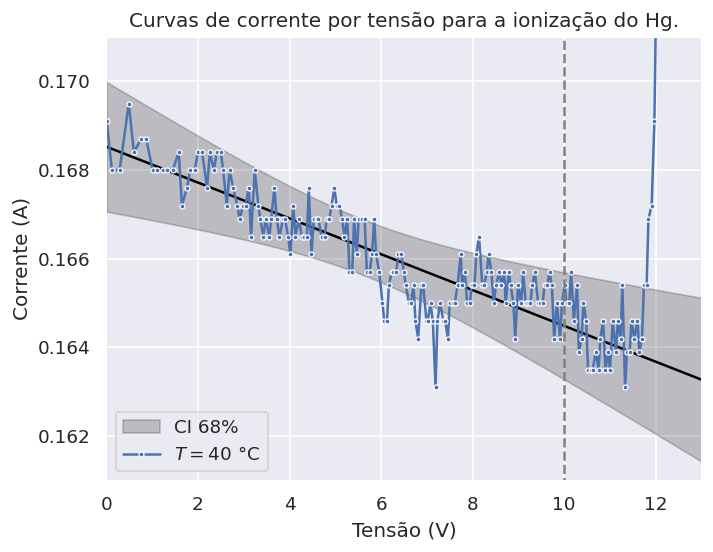

In [286]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')
plt.vlines(x=10, ymin=0, ymax=1, color='gray', linestyles='dashed')

plt.xlim(0, 13)
plt.ylim(0.161, 0.171)
plt.savefig(f'plots/ioni_linear_fit_pot_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

### 60 °C

In [287]:
T = 60
df = data[T]

In [288]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [289]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

In [290]:
# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

In [291]:
# Determinação do potenical de ionização
buff				= pd.DataFrame(df.loc[(df['Tensão (V)'] > 10)])
buff['Delta (A)']	= -buff['Corrente (A)'] - popt[0] * buff['Tensão (V)'] - popt[1]
Deltas				= list(t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (buff['Tensão (V)'] - np.mean(xdata))**2 / S_xx ))

In [292]:
for i,D in enumerate(list(buff['Delta (A)'])):
	if D > Deltas[i]:
		V0s.append(list(buff['Tensão (V)'])[i])
		break

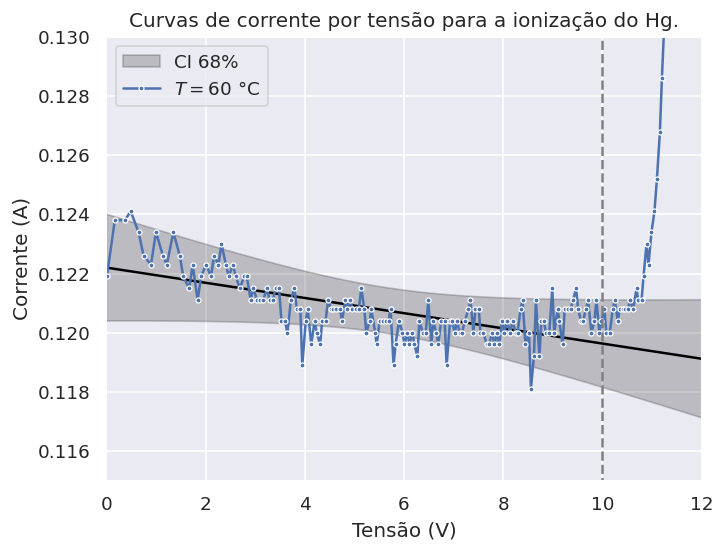

In [293]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')
plt.vlines(x=10, ymin=0, ymax=1, color='gray', linestyles='dashed')

plt.xlim(0, 12)
plt.ylim(0.115, 0.13)
plt.savefig(f'plots/ioni_linear_fit_pot_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

### 80 °C

In [294]:
T = 80
df = data[T]

In [295]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [296]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

In [297]:
# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

In [298]:
# Determinação do potenical de ionização
buff				= pd.DataFrame(df.loc[(df['Tensão (V)'] > 10)])
buff['Delta (A)']	= -buff['Corrente (A)'] - popt[0] * buff['Tensão (V)'] - popt[1]
Deltas				= list(t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (buff['Tensão (V)'] - np.mean(xdata))**2 / S_xx ))

In [299]:
for i,D in enumerate(list(buff['Delta (A)'])):
	if D > Deltas[i]:
		V0s.append(list(buff['Tensão (V)'])[i])
		break

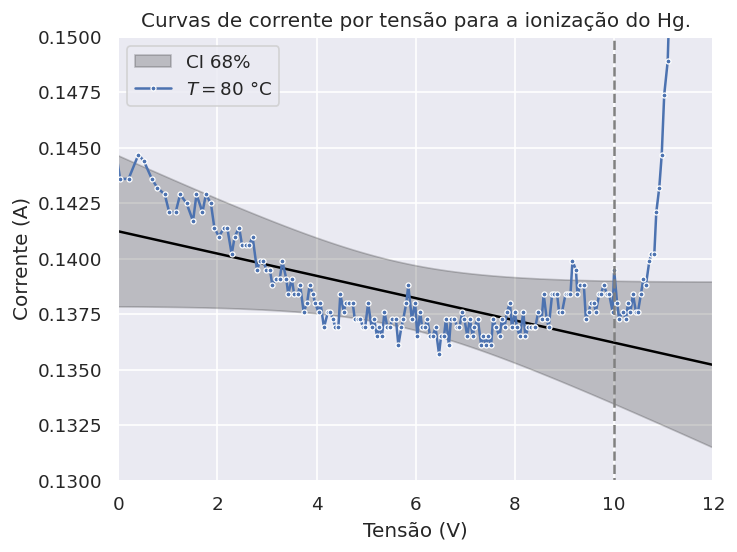

In [300]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')
plt.vlines(x=10, ymin=0, ymax=1, color='gray', linestyles='dashed')

plt.xlim(0, 12)
plt.ylim(0.13, 0.15)
plt.savefig(f'plots/ioni_linear_fit_pot_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

In [301]:
np.mean(V0s), np.std(V0s) / np.sqrt(3)

(10.476666666666667, 0.13542799097948952)

## Determinação do potencial de ionização (ajustes lineares)

In [302]:
V0s = []

### 40 °C

In [303]:
T = 40
df = data[T]

In [304]:
ranges = (0, 10), (14, 15)

data1 = df.loc[(df['Tensão (V)'] >= ranges[0][0]) & (df['Tensão (V)'] <= ranges[0][1])]
data2 = df.loc[(df['Tensão (V)'] >= ranges[1][0]) & (df['Tensão (V)'] <= ranges[1][1])]

In [305]:
fit1 = curve_fit(lambda x, a, b: a * x + b, xdata=data1['Tensão (V)'], ydata=-data1['Corrente (A)'])[0]
fit2 = curve_fit(lambda x, a, b: a * x + b, xdata=data2['Tensão (V)'], ydata=-data2['Corrente (A)'])[0]

In [306]:
V0s.append((fit2[1] - fit1[1]) / (fit1[0] - fit2[0]))

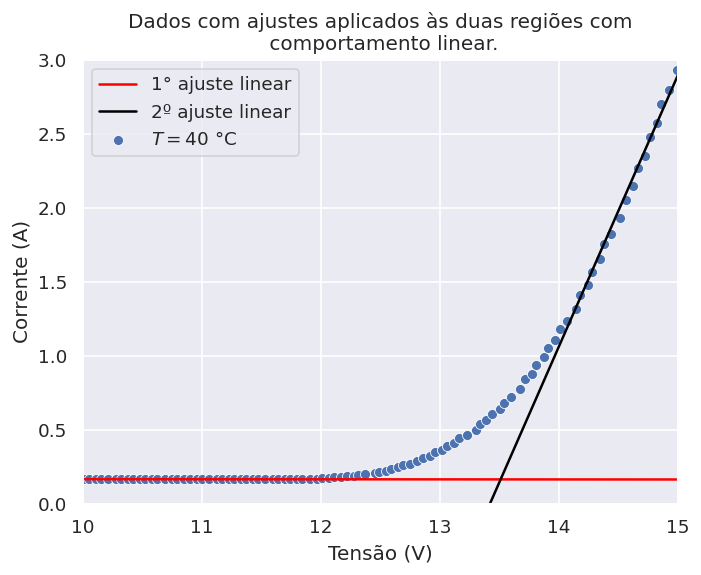

In [307]:
plt.title('Dados com ajustes aplicados às duas regiões com\n comportamento linear.')
x = np.linspace(0, 15, 10)

sns.lineplot(x=x, y=fit1[0] * x + fit1[1], color='red', label='1° ajuste linear')
sns.lineplot(x=x, y=fit2[0] * x + fit2[1], color='black', label='2º ajuste linear')
sns.scatterplot(x=df['Tensão (V)'], y=-df['Corrente (A)'], marker='o', label=f'$T={T}$ °C')

plt.xlim(10, 15)
plt.ylim(0, 3)
plt.savefig(f'plots/ioni_2linear_fits_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

### 60 °C

In [308]:
T = 60
df = data[T]

In [309]:
ranges = (0, 10), (13, 15)

data1 = df.loc[(df['Tensão (V)'] >= ranges[0][0]) & (df['Tensão (V)'] <= ranges[0][1])]
data2 = df.loc[(df['Tensão (V)'] >= ranges[1][0]) & (df['Tensão (V)'] <= ranges[1][1])]

In [310]:
fit1 = curve_fit(lambda x, a, b: a * x + b, xdata=data1['Tensão (V)'], ydata=-data1['Corrente (A)'])[0]
fit2 = curve_fit(lambda x, a, b: a * x + b, xdata=data2['Tensão (V)'], ydata=-data2['Corrente (A)'])[0]

In [311]:
V0s.append((fit2[1] - fit1[1]) / (fit1[0] - fit2[0]))

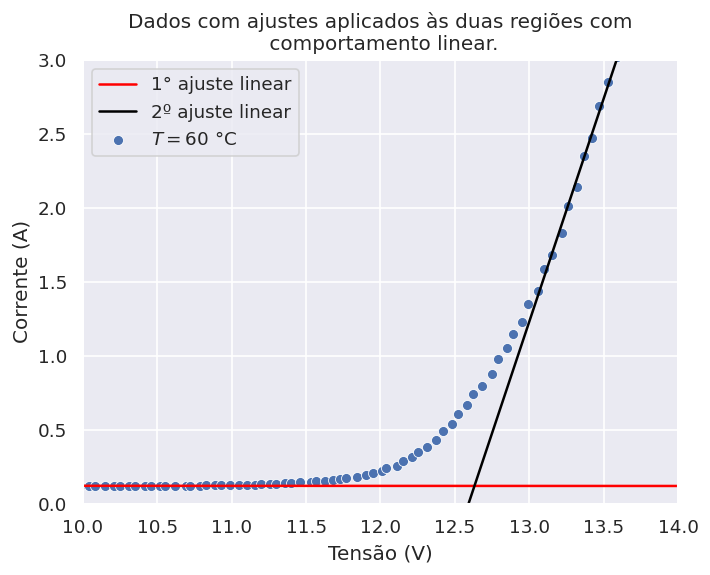

In [312]:
plt.title('Dados com ajustes aplicados às duas regiões com\n comportamento linear.')
x = np.linspace(0, 15, 10)

sns.lineplot(x=x, y=fit1[0] * x + fit1[1], color='red', label='1° ajuste linear')
sns.lineplot(x=x, y=fit2[0] * x + fit2[1], color='black', label='2º ajuste linear')
sns.scatterplot(x=df['Tensão (V)'], y=-df['Corrente (A)'], marker='o', label=f'$T={T}$ °C')

plt.xlim(10, 14)
plt.ylim(0, 3)
plt.savefig(f'plots/ioni_2linear_fits_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

### 80 °C

In [313]:
T = 80
df = data[T]

In [314]:
ranges = (0, 10), (13, 15)

data1 = df.loc[(df['Tensão (V)'] >= ranges[0][0]) & (df['Tensão (V)'] <= ranges[0][1])]
data2 = df.loc[(df['Tensão (V)'] >= ranges[1][0]) & (df['Tensão (V)'] <= ranges[1][1])]

In [315]:
fit1 = curve_fit(lambda x, a, b: a * x + b, xdata=data1['Tensão (V)'], ydata=-data1['Corrente (A)'])[0]
fit2 = curve_fit(lambda x, a, b: a * x + b, xdata=data2['Tensão (V)'], ydata=-data2['Corrente (A)'])[0]

In [316]:
V0s.append((fit2[1] - fit1[1]) / (fit1[0] - fit2[0]))

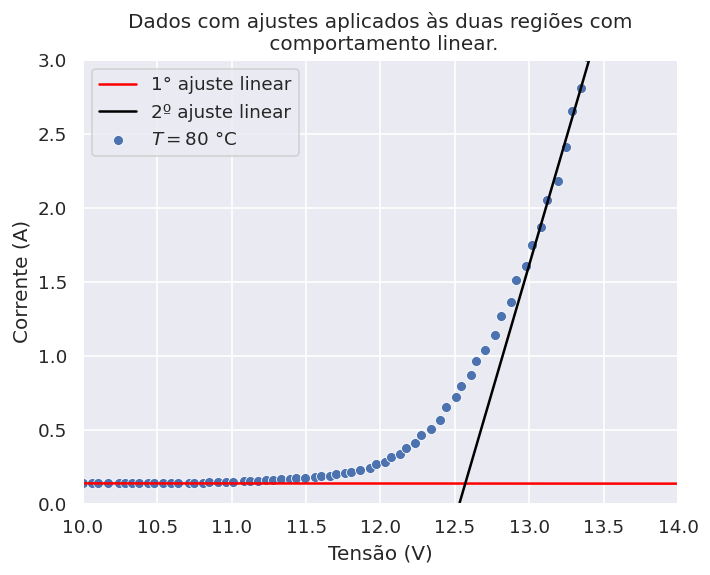

In [317]:
plt.title('Dados com ajustes aplicados às duas regiões com\n comportamento linear.')
x = np.linspace(0, 15, 10)

sns.lineplot(x=x, y=fit1[0] * x + fit1[1], color='red', label='1° ajuste linear')
sns.lineplot(x=x, y=fit2[0] * x + fit2[1], color='black', label='2º ajuste linear')
sns.scatterplot(x=df['Tensão (V)'], y=-df['Corrente (A)'], marker='o', label=f'$T={T}$ °C')

plt.xlim(10, 14)
plt.ylim(0, 3)
plt.savefig(f'plots/ioni_2linear_fits_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

In [318]:
np.mean(V0s), np.std(V0s) / np.sqrt(3)

(12.903622556800798, 0.24773545074515718)